In [31]:
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as ssm
import statsmodels.tools.eval_measures as seval
import sklearn.preprocessing as skp
import sklearn.impute as imp

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def rmse_accuracy_percentage(a,b):     
    print("RMSE is:", np.round(np.sqrt(sum(((np.array(a)-np.array(b))**2))/len(a)),2)) 

In [4]:
df = pd.read_csv("synthetic_data_regression.csv")

In [5]:
df.head()

,ID,Y1,Y2,Y3,Var1,Var2,Var3,Var4,Var5,Var6,...,Var32,Var33,CatVar0,CatVar1,CatVar2,CatVar3,CatVar4,CatVar5,CatVar6,CatVar7
0,0,83.757716,-11.374746,26.373839,-0.001280,-0.000019,-0.002674,0.000825,-0.000298,0.000331,...,-24099.421600,19587.850010,PQR,X,one,X,Y,EFG,three,Y
1,1,91.517378,-12.630470,25.703212,-0.002516,-0.000374,-0.000643,-0.001604,0.002569,0.000601,...,-1920.670332,-780.996277,Z,one,one,Y,MNO,PQR,three,three
2,2,85.794186,-11.511481,28.778470,0.002352,0.001389,0.002532,0.000628,0.000670,-0.000630,...,-3890.776204,-172.660412,PQR,PQR,one,X,Y,ABC,three,Y
3,3,87.979360,-12.180281,28.351211,-0.000375,-0.001630,-0.000916,-0.000958,0.001746,0.000099,...,1197.478152,-7673.252772,Y,Y,one,EFG,Z,PQR,Y,three
4,4,86.452012,-11.236202,29.498652,0.001180,-0.000804,-0.000551,-0.001142,0.001717,0.001673,...,11315.845950,-7166.860132,Y,PQR,one,X,Z,X,Y,three


In [6]:
df.shape

(100000, 45)

In [7]:
df_cols = df.columns

In [8]:
i = 1
for c in df_cols:
    print("Variable", i, ": ", c)
    i += 1

Variable 1 :  ID
Variable 2 :  Y1
Variable 3 :  Y2
Variable 4 :  Y3
Variable 5 :  Var1
Variable 6 :  Var2
Variable 7 :  Var3
Variable 8 :  Var4
Variable 9 :  Var5
Variable 10 :  Var6
Variable 11 :  Var7
Variable 12 :  Var8
Variable 13 :  Var9
Variable 14 :  Var10
Variable 15 :  Var11
Variable 16 :  Var12
Variable 17 :  Var13
Variable 18 :  Var14
Variable 19 :  Var15
Variable 20 :  Var16
Variable 21 :  Var17
Variable 22 :  Var18
Variable 23 :  Var19
Variable 24 :  Var20
Variable 25 :  Var21
Variable 26 :  Var22
Variable 27 :  Var23
Variable 28 :  Var24
Variable 29 :  Var25
Variable 30 :  Var26
Variable 31 :  Var27
Variable 32 :  Var28
Variable 33 :  Var29
Variable 34 :  Var30
Variable 35 :  Var31
Variable 36 :  Var32
Variable 37 :  Var33
Variable 38 :  CatVar0
Variable 39 :  CatVar1
Variable 40 :  CatVar2
Variable 41 :  CatVar3
Variable 42 :  CatVar4
Variable 43 :  CatVar5
Variable 44 :  CatVar6
Variable 45 :  CatVar7


In [9]:
#There are 2 NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       100000 non-null  int64  
 1   Y1       100000 non-null  float64
 2   Y2       100000 non-null  float64
 3   Y3       100000 non-null  float64
 4   Var1     100000 non-null  float64
 5   Var2     100000 non-null  float64
 6   Var3     100000 non-null  float64
 7   Var4     100000 non-null  float64
 8   Var5     100000 non-null  float64
 9   Var6     100000 non-null  float64
 10  Var7     100000 non-null  float64
 11  Var8     100000 non-null  float64
 12  Var9     100000 non-null  float64
 13  Var10    100000 non-null  float64
 14  Var11    100000 non-null  float64
 15  Var12    100000 non-null  float64
 16  Var13    100000 non-null  float64
 17  Var14    100000 non-null  float64
 18  Var15    100000 non-null  float64
 19  Var16    100000 non-null  float64
 20  Var17    100000 non-null  f

In [10]:
df.describe()

,ID,Y1,Y2,Y3,Var1,Var2,Var3,Var4,Var5,Var6,...,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,87.248616,-11.697565,27.533170,0.000004,0.000002,2.939170e-06,-0.000003,0.000003,-0.000002,...,5.696067,3.190854,1.590234,47.678929,16.440528,-43.428855,-5.759525,-11.688151,77.960692,-22.142038
std,28867.657797,3.984697,0.637874,2.882042,0.001741,0.001483,1.402047e-03,0.001402,0.001697,0.001143,...,7868.168615,8939.930334,9904.190963,7157.749267,8850.488099,8740.151812,6721.335300,10562.579298,9974.982681,8757.587752
min,0.000000,68.628714,-14.527156,1.901104,-0.007307,-0.006308,-5.447208e-03,-0.006183,-0.008319,-0.004784,...,-49327.084990,-60121.862310,-72857.184090,-45910.873940,-51624.484540,-52919.758000,-43612.961970,-63768.255680,-59571.721940,-72730.688000
25%,24999.750000,84.543322,-12.130285,26.249292,-0.001173,-0.000997,-9.424930e-04,-0.000954,-0.001140,-0.000772,...,-3589.056090,-4087.050978,-4506.268811,-3174.409128,-4015.144063,-4013.225416,-3048.562854,-4803.195738,-4431.965884,-3976.717492
50%,49999.500000,87.253163,-11.697218,27.964638,0.000003,0.000005,-6.290000e-07,-0.000003,0.000009,-0.000007,...,-16.543142,6.586580,1.945477,10.247751,-6.017313,-20.378875,-14.351688,3.061218,21.533146,-6.951980
75%,74999.250000,89.942698,-11.268642,29.369648,0.001173,0.001002,9.509073e-04,0.000946,0.001145,0.000771,...,3524.770690,4110.734479,4505.315497,3250.639704,4000.775402,3887.713389,3047.274189,4728.996445,4577.359839,3924.552143
max,99999.000000,104.814590,-8.485501,37.129631,0.007585,0.006354,5.981167e-03,0.005852,0.007529,0.004909,...,48806.559040,58226.785670,64335.330060,55157.420750,55262.122720,49217.946250,37811.721890,67621.314370,62658.390910,54517.670220


In [11]:
# Quick categorical Label encoding - to review correlations
# cat_features_n -> for the two categorical variables with NaN values
cat_features = ['CatVar0', 'CatVar1', 'CatVar2', 'CatVar3', 'CatVar4', 'CatVar6']
cat_features_n = ['CatVar5', 'CatVar7']
catEncoder = skp.LabelEncoder()

for c in cat_features:
    new_c = c + "_Enc"
    df[new_c] = catEncoder.fit_transform(df[c].astype(str))
    
# impute NaN as the most common value (there are only 2 NaN values)
# then create the new label-encoded column
imputer = imp.SimpleImputer(strategy="most_frequent")
imputer.fit_transform(df)
for c in cat_features_n:
    new_c = c + "_Enc"
    df[new_c] = catEncoder.fit_transform(df[c].astype(str))
    
df.drop(cat_features, axis=1, inplace=True)
df.drop(cat_features_n, axis=1, inplace=True)

<AxesSubplot:>

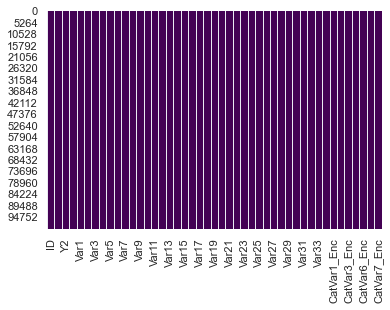

In [12]:
#double check for NULLs and NaNs
sb.set()
sb.heatmap(df.isnull(), cbar=False, cmap='viridis')

<AxesSubplot:>

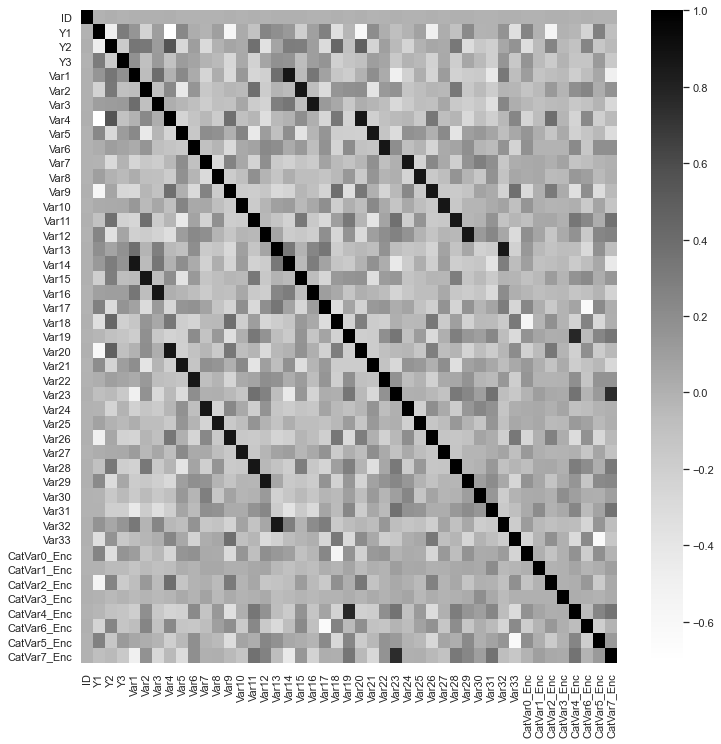

In [13]:
#overview correlation plot - looks like some of these datapoints are basically identical: Var1 and Var14, for example
plt.figure(figsize=(12,12))
sb.heatmap(df.corr(),cmap='Greys',annot=False)

<AxesSubplot:xlabel='Y1', ylabel='Count'>

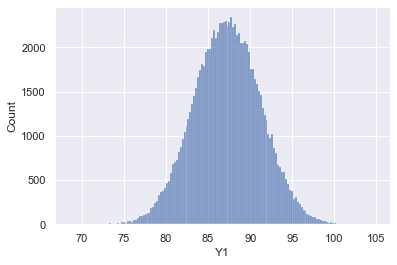

In [14]:
# Outcome variable distributions, Y1
sb.histplot(df['Y1'],kde = False)

<AxesSubplot:xlabel='Y2', ylabel='Count'>

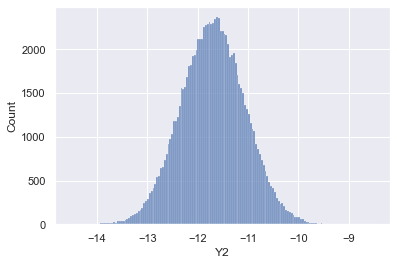

In [15]:
# Outcome variable distributions, Y2
sb.histplot(df['Y2'],kde = False)

Y3 minimum:  1.901104194
Y3 mean:  27.533170050433906
Y3 maximum:  37.12963109


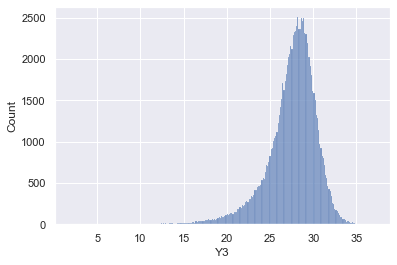

In [16]:
# Outcome variable distributions, Y3
# NOTE: this data is left-tailed and has outliers
sb.histplot(df['Y3'],kde = False)
print("Y3 minimum: ", df['Y3'].min())
print("Y3 mean: ", df['Y3'].mean())
print("Y3 maximum: ", df['Y3'].max())

<AxesSubplot:xlabel='Y1'>

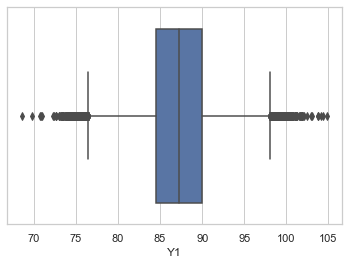

In [17]:
# Box plots for outcome variables - checking on outliers
sb.set_theme(style="whitegrid")
sb.boxplot(x=df["Y1"])

<AxesSubplot:xlabel='Y2'>

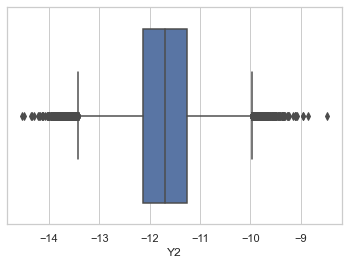

In [18]:
sb.boxplot(x=df["Y2"])

<AxesSubplot:xlabel='Y3'>

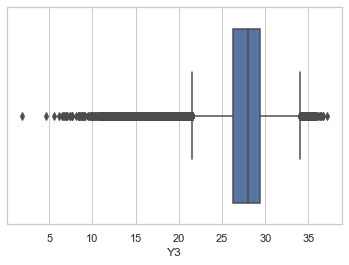

In [19]:
sb.boxplot(x=df["Y3"])

In [20]:
# Save all Y dataframe for later scatterplot matrix
allY_df = pd.DataFrame(df, columns=["Y1", "Y2", "Y3"])

# Prepare all X variable dataframe for OLS modeling against each Y
allX_df = df.drop(["ID", "Y1", "Y2", "Y3"], axis=1)
allX_cols = allX_df.columns

In [21]:
# Apply MinMaxScaler to the X / predictor variables
# MinMaxScaler normalizes while preserving the relationships and meanings of the data
mms = skp.MinMaxScaler()
allX_mm = mms.fit_transform(allX_df)
allXmm_df = pd.DataFrame(allX_mm, columns=allX_cols)

''

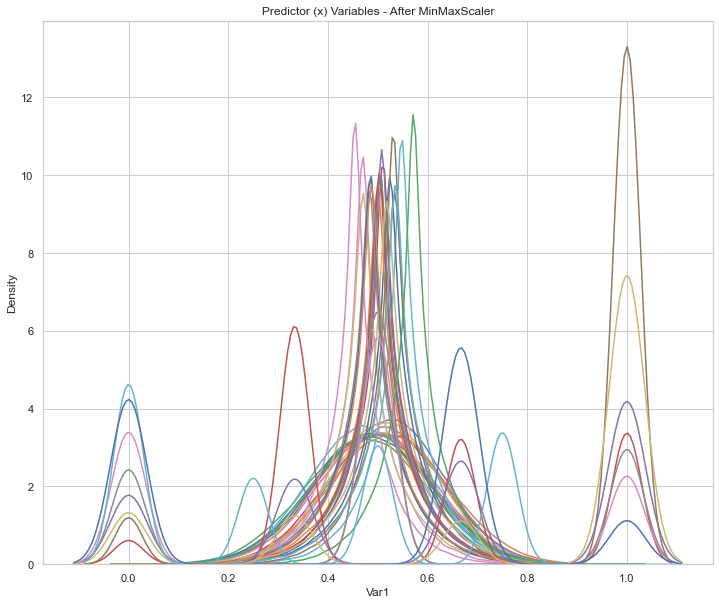

In [23]:
# Things that look multimodal are CATEGORICAL / Label Encoded
allXmm_df.typefig, (ax1) = plt.subplots(ncols=1, figsize=(12, 10))
ax1.set_title('Predictor (x) Variables - After MinMaxScaler')

for c in allX_cols:
    sb.kdeplot(allXmm_df[c], ax=ax1)
;

In [24]:
# Make a copy with ALL Xs to try in OLS against Y1
# Remove ID, Y2 and Y3
df_copy = df.drop(["ID", "Y2", "Y3"], axis=1)
# Keep a list of the x variables
df_cols_copy = df_copy.drop("Y1", axis=1)
df_cols = df_cols_copy.columns

In [25]:
Y = df_copy["Y1"].copy()
X_df = pd.DataFrame(df_cols_copy, columns=df_cols)

In [26]:
X=ssm.add_constant(X_df)

In [27]:
# Y1 OLS - R-squared = 0.8
model= ssm.OLS(Y,X).fit()
s= model.summary()
s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     9746.
Date:                Sun, 28 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:55:03   Log-Likelihood:            -1.9969e+05
No. Observations:              100000   AIC:                         3.995e+05
Df Residuals:                   99958   BIC:                         3.999e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          90.2622      0.038   2404.138      0.000      90.189      90.336
Var1         -271.1885      7.435    -36.476      0.000    -285.760    -256.617
Var2           -3.8495      8.245     -0.467      0.641     -20.011      12.312
Var3            4.1149      8.538      0.482      0.630     -12.619      20.849
Var4        -1517.7277      8.770   -173.056      0.000   -1534.917   -1500.538
Var5           18.8276      7.439      2.531      0.011       4.248      33.408
Var6         -464.4140     10.301    -45.085      0.000    -484.604    -444.224
Var7            5.5887      8.870      0.630      0.529     -11.796      22.974
Var8          -47.7347      7.763     -6.149      0.000     -62.950     -32.519
Var9        -1092.3545      7.436   -146.899      0.000   -1106.929   -1077.780
Var10        -403.3395      9.504    -42.437      0.000    -421.968    -384.711
Var11        -261.8802      8.181    -32.009      0.000    -277.916    -245.845
Var12          34.0050      7.985      4.259      0.000      18.355      49.655
Var13          45.8665      6.963      6.587      0.000      32.219      59.515
Var14       -1.801e-06   1.13e-06     -1.599      0.110   -4.01e-06    4.07e-07
Var15        1.184e-06   1.32e-06      0.893      0.372   -1.41e-06    3.78e-06
Var16        2.822e-06    1.4e-06      2.012      0.044    7.23e-08    5.57e-06
Var17        1.044e-06   8.01e-07      1.304      0.192   -5.25e-07    2.61e-06
Var18         -9.9e-06   7.93e-07    -12.485      0.000   -1.15e-05   -8.35e-06
Var19       -5.295e-05   8.52e-07    -62.133      0.000   -5.46e-05   -5.13e-05
Var20        1.989e-07    1.4e-06      0.142      0.887   -2.54e-06    2.94e-06
Var21        1.616e-06   1.16e-06      1.397      0.162   -6.51e-07    3.88e-06
Var22       -7.935e-07   1.72e-06     -0.462      0.644   -4.16e-06    2.57e-06
Var23       -3.027e-06   8.14e-07     -3.721      0.000   -4.62e-06   -1.43e-06
Var24        3.524e-06   1.45e-06      2.438      0.015    6.91e-07    6.36e-06
Var25        8.832e-07   1.27e-06      0.693      0.488   -1.61e-06    3.38e-06
Var26        6.015e-07   1.15e-06      0.525      0.600   -1.65e-06    2.85e-06
Var27       -1.513e-07   1.59e-06     -0.095      0.924   -3.28e-06    2.97e-06
Var28        3.368e-08   1.28e-06      0.026      0.979   -2.48e-06    2.55e-06
Var29       -6.684e-07    1.3e-06     -0.514      0.607   -3.22e-06    1.88e-06
Var30       -5.353e-06   9.36e-07     -5.720      0.000   -7.19e-06   -3.52e-06
Var31       -2.344e-05    6.9e-07    -33.970      0.000   -2.48e-05   -2.21e-05
Var32       -1.196e-06   1.13e-06     -1.061      0.289   -3.41e-06    1.01e-06
Var33       -4.983e-05   8.92e-07    -55.867      0.000   -5.16e-05   -4.81e-05
CatVar0_Enc     0.0715      0.008      9.308      0.000       0.056       0.087
CatVar1_Enc    -0.0216      0.005     -4.13

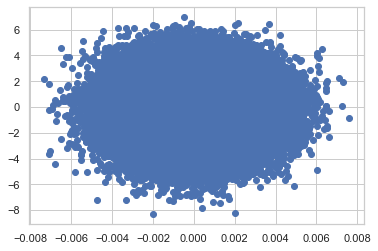

In [28]:
plt.scatter(model.model.exog[:,1], model.resid)

In [32]:
ypred = model.predict(X)
rmse = seval.rmse(Y, ypred)
rmse

1.7824565796941758

In [33]:
# Make a copy with ALL Xs to try in OLS against Y2
# Remove ID, Y1 and Y3
df_copy = df.drop(["ID", "Y1", "Y3"], axis=1)
# Keep a list of the x variables
df_cols_copy = df_copy.drop("Y2", axis=1)
df_cols = df_cols_copy.columns

In [34]:
Y = df_copy["Y2"].copy()
X_df = pd.DataFrame(df_cols_copy, columns=df_cols)

In [35]:
X=ssm.add_constant(X_df)

In [36]:
# Y2 OLS - R-squared = 0.827
model= ssm.OLS(Y,X).fit()
s= model.summary()
s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                 1.163e+04
Date:                Sun, 28 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:58:36   Log-Likelihood:                -9287.7
No. Observations:              100000   AIC:                         1.866e+04
Df Residuals:                   99958   BIC:                         1.906e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -11.6064      0.006  -2075.260      0.000     -11.617     -11.595
Var1          198.2618      1.107    179.018      0.000     196.091     200.433
Var2            0.9437      1.228      0.768      0.442      -1.464       3.351
Var3            3.3485      1.272      2.633      0.008       0.856       5.841
Var4          210.9224      1.306    161.449      0.000     208.362     213.483
Var5           -0.7925      1.108     -0.715      0.474      -2.964       1.379
Var6          118.3140      1.534     77.105      0.000     115.307     121.322
Var7           -4.0228      1.321     -3.045      0.002      -6.613      -1.433
Var8            1.3275      1.156      1.148      0.251      -0.939       3.594
Var9           18.0018      1.108     16.251      0.000      15.831      20.173
Var10          90.2316      1.416     63.731      0.000      87.457      93.007
Var11         203.0705      1.219    166.625      0.000     200.682     205.459
Var12          -6.4291      1.189     -5.405      0.000      -8.760      -4.098
Var13          -3.3961      1.037     -3.274      0.001      -5.429      -1.363
Var14         3.06e-07   1.68e-07      1.823      0.068    -2.3e-08    6.35e-07
Var15       -2.789e-07   1.97e-07     -1.413      0.158   -6.66e-07    1.08e-07
Var16        1.916e-08   2.09e-07      0.092      0.927    -3.9e-07    4.29e-07
Var17       -6.976e-07   1.19e-07     -5.850      0.000   -9.31e-07   -4.64e-07
Var18        1.918e-05   1.18e-07    162.376      0.000    1.89e-05    1.94e-05
Var19       -3.752e-07   1.27e-07     -2.955      0.003   -6.24e-07   -1.26e-07
Var20       -5.591e-08   2.08e-07     -0.268      0.789   -4.65e-07    3.53e-07
Var21       -5.436e-07   1.72e-07     -3.155      0.002   -8.81e-07   -2.06e-07
Var22        8.311e-08   2.56e-07      0.325      0.745   -4.18e-07    5.84e-07
Var23        5.853e-07   1.21e-07      4.830      0.000    3.48e-07    8.23e-07
Var24       -1.405e-07   2.15e-07     -0.653      0.514   -5.62e-07    2.81e-07
Var25       -1.496e-08    1.9e-07     -0.079      0.937   -3.87e-07    3.57e-07
Var26        2.641e-07   1.71e-07      1.546      0.122   -7.06e-08    5.99e-07
Var27       -4.381e-07   2.37e-07     -1.845      0.065   -9.03e-07    2.72e-08
Var28        3.623e-07   1.91e-07      1.893      0.058   -1.28e-08    7.37e-07
Var29         2.08e-07   1.94e-07      1.073      0.283   -1.72e-07    5.88e-07
Var30        5.585e-09   1.39e-07      0.040      0.968   -2.68e-07    2.79e-07
Var31        4.291e-06   1.03e-07     41.742      0.000    4.09e-06    4.49e-06
Var32       -6.113e-08   1.68e-07     -0.364      0.716    -3.9e-07    2.68e-07
Var33        1.683e-06   1.33e-07     12.669      0.000    1.42e-06    1.94e-06
CatVar0_Enc    -0.0650      0.001    -56.841      0.000      -0.067      -0.063
CatVar1_Enc     0.0032      0.001      4.05

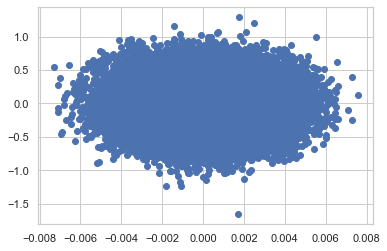

In [37]:
plt.scatter(model.model.exog[:,1], model.resid)

In [38]:
ypred = model.predict(X)
rmse = seval.rmse(Y, ypred)
rmse

0.26552107482706366

In [39]:
# Make a copy with ALL Xs to try in OLS against Y3
# Remove ID, Y1 and Y2
df_copy = df.drop(["ID", "Y1", "Y2"], axis=1)
# Keep a list of the x variables
df_cols_copy = df_copy.drop("Y3", axis=1)
df_cols = df_cols_copy.columns

In [40]:
Y = df_copy["Y3"].copy()
X_df = pd.DataFrame(df_cols_copy, columns=df_cols)

In [41]:
X=ssm.add_constant(X_df)

In [42]:
# Y3 OLS R-squared only 0.218
model= ssm.OLS(Y,X).fit()
s = model.summary()
s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y3   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     678.9
Date:                Sun, 28 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:59:12   Log-Likelihood:            -2.3546e+05
No. Observations:              100000   AIC:                         4.710e+05
Df Residuals:                   99958   BIC:                         4.714e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          28.0916      0.054    523.230      0.000      27.986      28.197
Var1         -178.0425     10.632    -16.746      0.000    -198.880    -157.205
Var2           12.9084     11.791      1.095      0.274     -10.202      36.019
Var3           52.9633     12.209      4.338      0.000      29.034      76.893
Var4            1.0532     12.541      0.084      0.933     -23.528      25.634
Var5            8.8686     10.637      0.834      0.404     -11.981      29.718
Var6          -41.2223     14.730     -2.798      0.005     -70.094     -12.351
Var7           -5.1730     12.684     -0.408      0.683     -30.034      19.688
Var8          -34.3774     11.101     -3.097      0.002     -56.136     -12.619
Var9         -554.3148     10.634    -52.128      0.000    -575.157    -533.473
Var10        -165.0481     13.591    -12.144      0.000    -191.687    -138.409
Var11        -348.7888     11.699    -29.812      0.000    -371.720    -325.858
Var12          31.9080     11.418      2.794      0.005       9.529      54.288
Var13          30.8949      9.958      3.103      0.002      11.378      50.412
Var14         2.99e-07   1.61e-06      0.186      0.853   -2.86e-06    3.46e-06
Var15        -5.11e-07   1.89e-06     -0.270      0.787   -4.22e-06     3.2e-06
Var16       -6.597e-06   2.01e-06     -3.289      0.001   -1.05e-05   -2.67e-06
Var17       -5.946e-07   1.14e-06     -0.519      0.604   -2.84e-06    1.65e-06
Var18       -2.837e-05   1.13e-06    -25.021      0.000   -3.06e-05   -2.61e-05
Var19       -2.557e-05   1.22e-06    -20.984      0.000    -2.8e-05   -2.32e-05
Var20       -2.572e-06      2e-06     -1.285      0.199   -6.49e-06    1.35e-06
Var21        5.376e-07   1.65e-06      0.325      0.745    -2.7e-06    3.78e-06
Var22        2.699e-06   2.45e-06      1.100      0.271   -2.11e-06    7.51e-06
Var23       -4.452e-06   1.16e-06     -3.827      0.000   -6.73e-06   -2.17e-06
Var24        2.246e-06   2.07e-06      1.087      0.277   -1.81e-06     6.3e-06
Var25       -1.321e-07   1.82e-06     -0.073      0.942    -3.7e-06    3.44e-06
Var26        2.712e-06   1.64e-06      1.654      0.098   -5.02e-07    5.93e-06
Var27        3.798e-06   2.28e-06      1.667      0.096   -6.69e-07    8.27e-06
Var28       -1.867e-06   1.84e-06     -1.016      0.310   -5.47e-06    1.73e-06
Var29       -7.531e-07   1.86e-06     -0.405      0.686    -4.4e-06    2.89e-06
Var30       -3.259e-06   1.34e-06     -2.435      0.015   -5.88e-06   -6.36e-07
Var31       -4.113e-05   9.87e-07    -41.680      0.000   -4.31e-05   -3.92e-05
Var32       -9.293e-07   1.61e-06     -0.576      0.564   -4.09e-06    2.23e-06
Var33       -2.217e-05   1.28e-06    -17.381      0.000   -2.47e-05   -1.97e-05
CatVar0_Enc     0.1040      0.011      9.469      0.000       0.082       0.126
CatVar1_Enc    -0.0203      0.007     -2.72

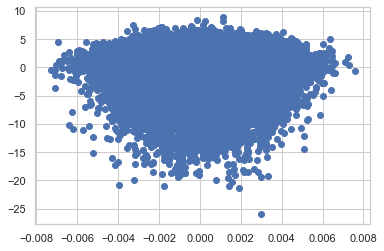

In [44]:
plt.scatter(model.model.exog[:,1], model.resid)

In [45]:
ypred = model.predict(X)
rmse = seval.rmse(Y, ypred)
rmse

2.5489240476798343

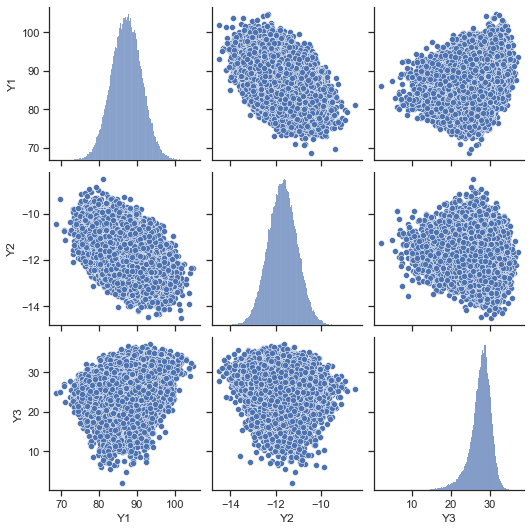

In [46]:
# Y1, Y2 and Y3 - scatterplot matrix
# NOTE: There is a weak (wide), but significant negative correlation between Y1, and Y2
# There appears to be no significant relationship between Y1 or Y2 and Y3
# The data plotted in Y1 v. Y3 and Y2 v. Y3 appears more or less random & cloud-like
sb.set_theme(style="ticks")
sb.pairplot(allY_df)

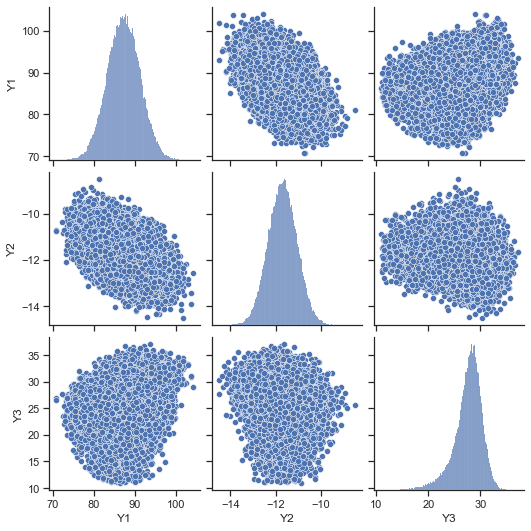

In [47]:
# Filter outliers
# This code by Joe Kington (2012)
# Returns a boolean array with True if points are outliers, and False otherwise
# points = an nxn array of observations, thresh = the modified z-score to use as threshold
# obserations with a modified z-score based on median abs. deviation > the thresh value
# will be classified as outliers
def is_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

# Call it, tighten threshold to 3.1
allY_filtered = allY_df[~is_outlier(allY_df.values, 3.1)]

# Plot the filtered results for comparison with above 
sb.pairplot(allY_filtered)

In [48]:
allY_df.shape

(100000, 3)

In [49]:
# 90 outliers removed
allY_filtered.shape

(99910, 3)

<AxesSubplot:xlabel='Y1'>

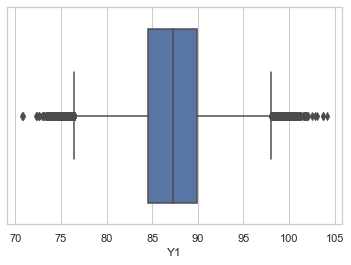

In [50]:
# Box plots for comparison after outliers cleaned by z-score threshold
# NOTE: This is probably not necessary for this data set, as it did not impact OLS modeling at all
# When OLS modeling was repeated on the outlier-filtered dataset, there was no difference in 
# R-squared for any of the models.
sb.set_theme(style="whitegrid")
sb.boxplot(x=allY_filtered["Y1"])

<AxesSubplot:xlabel='Y2'>

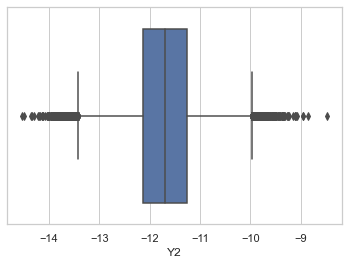

In [51]:
sb.boxplot(x=allY_filtered["Y2"])

<AxesSubplot:xlabel='Y3'>

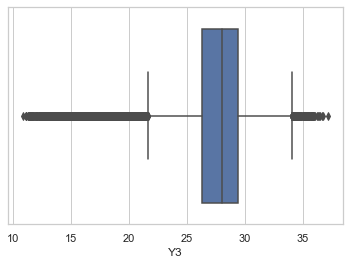

In [52]:
sb.boxplot(x=allY_filtered["Y3"])